# Import  
파이썬에서 다른 모듈이나 패키지에서 함수, 클래스 등을 가져옵니다.

In [1]:
!pip install koreanize-matplotlib
import koreanize_matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\HOME\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

#### 시드(seed) 고정  
매번 고정된 결과를 얻기 위해서 사용합니다.  
시드를 고정하지 않는다면 같은 코드라도 매번 다른 결과가 나올 수 있습니다.

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

#### 데이터 읽어오기 및 데이터 확인

In [4]:
# pd.read_csv() 함수를 사용해서 데이터를 읽어오는 코드입니다.
train = pd.read_csv('C:/Users/HOME/Downloads/범죄분류데이터/train.csv')

# 데이터를 확인하기 위해 head() 함수를 사용합니다.
train.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


#### 독립변수(x_train), 종속변수(y_train)로 분리하기  


In [5]:
x_train = train.drop(['ID', 'TARGET'], axis = 1)
y_train = train['TARGET']


#### train , validation data 나누기

In [6]:
X_tr, X_val, Y_tr, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

#### 라벨인코딩(Label Encoding)

In [7]:

ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()

    # Fit and transform on the training data
    le = le.fit(X_tr[feature])
    X_tr[feature] = le.transform(X_tr[feature])

    # Transform the test data (Note: Only transform, do not fit again to avoid data leakage)
    X_val[feature] = le.transform(X_val[feature])



### GradientBoost

In [8]:
model= GradientBoostingClassifier(random_state=42)
model.fit(X_tr, Y_tr)

y_pred = model.predict(X_val)

#### 예측

정확도 : 0.5516
정말도 : 0.5506
Recall: 0.5516
F1 Score: 0.5408
Confusion Matrix:
[[8051 1180 1688]
 [3097 3204 1341]
 [3073  976 2712]]


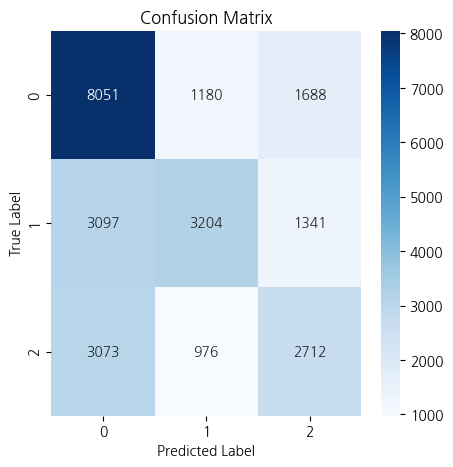

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Sampling

##### 오버샘플링

In [10]:
ros=RandomUnderSampler(random_state=42)
x_tr_over,y_tr_over=ros.fit_resample(X_tr,Y_tr)


In [11]:
model= GradientBoostingClassifier(random_state=42)
model.fit(x_tr_over,y_tr_over)

y_pred = model.predict(X_val)

정확도 : 0.5474
정말도 : 0.5449
Recall: 0.5474
F1 Score: 0.5440
Confusion Matrix:
[[7263 1719 1937]
 [2386 3649 1607]
 [2711 1101 2949]]


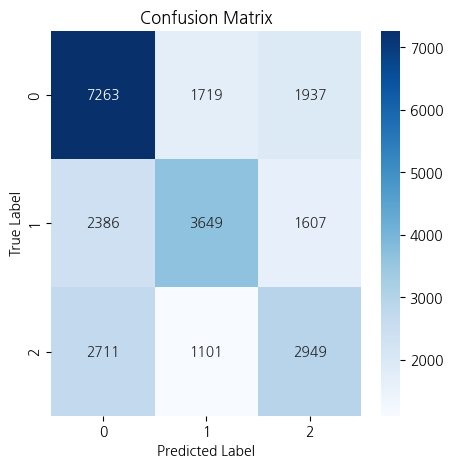

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
# 샘플링 과정이 없던 모델보다 성능이 좋은 것 확인
# 가장 분류가 안되었던 class 3이 이전 모델보다 훨씬 많이 분류되었음

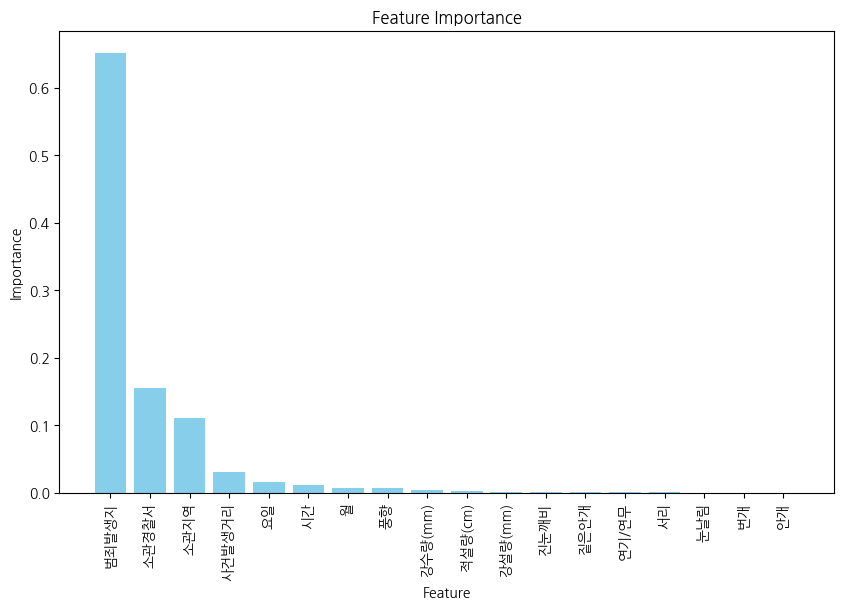

In [13]:
importances=model.feature_importances_

feature_importance_df=pd.DataFrame({'Feature':X_tr.columns,'Importance':importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

##### SMOTE

In [14]:
smote=SMOTE(random_state=42)
x_tr_smote,y_tr_smote=smote.fit_resample(X_tr,Y_tr)

In [15]:
model= GradientBoostingClassifier(random_state=42)
model.fit(x_tr_smote,y_tr_smote)

y_pred = model.predict(X_val)

정확도 : 0.5483
정말도 : 0.5462
Recall: 0.5483
F1 Score: 0.5423
Confusion Matrix:
[[7581 1411 1927]
 [2683 3435 1524]
 [2828 1066 2867]]


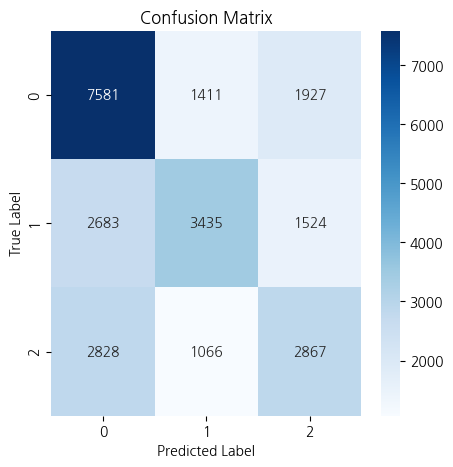

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

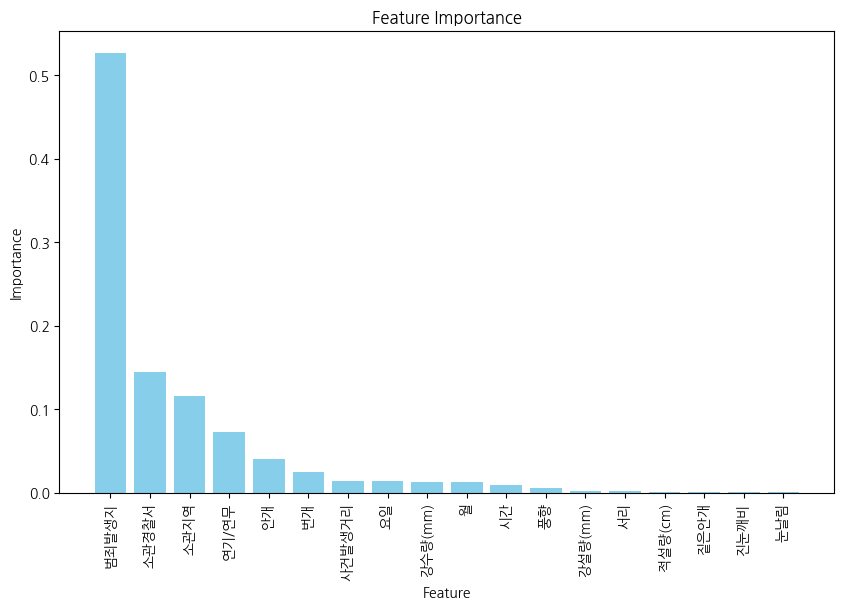

In [17]:
importances=model.feature_importances_

feature_importance_df=pd.DataFrame({'Feature':X_tr.columns,'Importance':importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [21]:
'''
정확도 : 0.5336
정말도 : 0.5377
Recall: 0.5336
F1 Score: 0.5349
Confusion Matrix:
[[6437 1903 2579]
 [2085 3811 1746]
 [2289 1208 3264]]
 '''

'\n정확도 : 0.5336\n정말도 : 0.5377\nRecall: 0.5336\nF1 Score: 0.5349\nConfusion Matrix:\n[[6437 1903 2579]\n [2085 3811 1746]\n [2289 1208 3264]]\n '

#### 언더샘플링

In [18]:
rus=RandomUnderSampler(random_state=42)
x_tr_under,y_tr_under=rus.fit_resample(X_tr,Y_tr)

In [19]:
model= GradientBoostingClassifier(random_state=42)
model.fit(x_tr_under,y_tr_under)

y_pred = model.predict(X_val)

정확도 : 0.5474
정말도 : 0.5449
Recall: 0.5474
F1 Score: 0.5440
Confusion Matrix:
[[7263 1719 1937]
 [2386 3649 1607]
 [2711 1101 2949]]


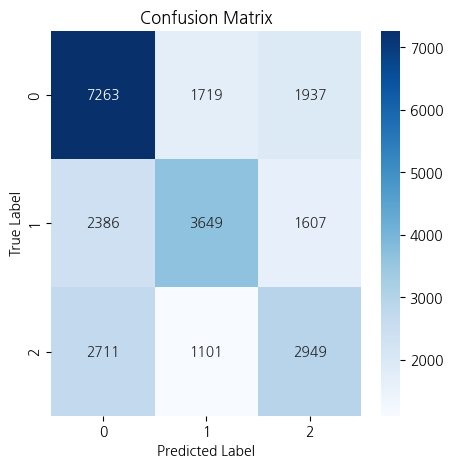

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# class 3 은 가장 많이 분류함